# Методы машинного обучения.

## ЛР3. - Проверка гипотезы о математическом ожидании - Две выборки

Сгенерировать две независимые выборки $x_1,…,x_n$ и $y_1,…,y_m$ с нормальные законом распределения и с параметрами  $(a_1,σ_1^2 )$ и $(a_2,σ_2^2 )$  соответствено. Изначально $a_1= a_2$ и $σ_1^2=σ_2^2$. Для полученных выборок предполагаем, что обе дисперсии неизвестны, но они равны между собой.

1. Осуществить проверку гипотезы $H_0$ о соответствии выборок нормальному закону распределения.

2. Осуществить проверку гипотезы $H_0$ о принадлежности выборок одной генеральной совокупности.

3. Осуществить проверку гипотезы $H_0: a_1 = a_2$ против альтернативы $H_1: a_1≠a_2$.

4. Производить сдвиг вправо всех элементов второй выборки на величину $∆=0.01$ и осуществлять проверку гипотезы $H_0: a_1= a_2$ до тех пор, пока гипотеза $H_0$ не будет отвергнута.

5. Для второй выборки назначить $a_2$ равным середине пройденного отрезка из пункта 3. Постепенно увеличивать число элементов в выборках и осуществлять проверку гипотезы $H_0: a_1= a_2$ до тех пор, пока гипотеза $H_0$ не будет отвергнута.

6. Рассчитать 95% доверительные интервалы для математических ожиданий двух выборок в момент, когда гипотеза $H_0$ была отвергнута в пунктах 3 и 4.

Дополнительное представление результатов:
- Вывести на экран гистограммы двух выборок;
- Отобразить в виде графиков динамику изменения значений статистики критерия и P-value для всех итераций проверки гипотезы из пунктов 3 и 4.


## Выполнение

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# Параметры
a = 0
sigma = 1
n = m = 30
delta = 0.1
alpha = 0.05

In [ ]:
# Выборки
x = np.random.normal(a, sigma, n)
y = np.random.normal(a, sigma, n)

x_0, y_0 = x, y

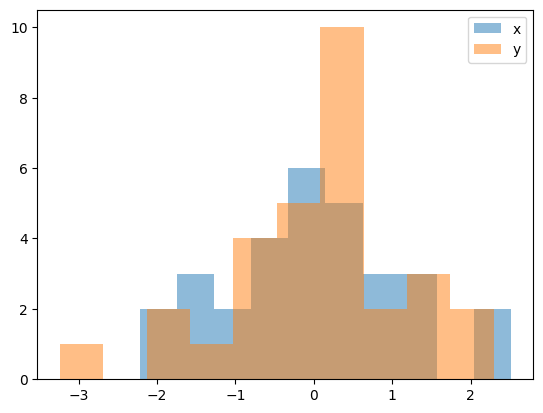

In [ ]:
# Гистограммы выборок
plt.hist(x, alpha=0.5, label='x')
plt.hist(y, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

1. Осуществить проверку гипотезы $H_0$ о соответствии выборок нормальному закону распределения.


In [ ]:
shapiro_test1 = stats.shapiro(x)
shapiro_test2 = stats.shapiro(y)

print("Тест Шапиро-Уилка для выборки 1: Statistic =", shapiro_test1.statistic, "p-value =", shapiro_test1.pvalue)
print("Тест Шапиро-Уилка для выборки 2: Statistic =", shapiro_test2.statistic, "p-value =", shapiro_test2.pvalue)

Тест Шапиро-Уилка для выборки 1: Statistic = 0.9897741033091547 p-value = 0.9899314165003401
Тест Шапиро-Уилка для выборки 2: Statistic = 0.9657874726818982 p-value = 0.43119576542781135


2. Осуществить проверку гипотезы $H_0$ о принадлежности выборок одной генеральной совокупности.

3. Осуществить проверку гипотезы $H_0: a_1 = a_2$ против альтернативы $H_1: a_1≠a_2$.

In [ ]:
t_stat, p_value = stats.ttest_ind(x, y, equal_var=True)
print("Тест Стьюдента для выборок: Statistic =", t_stat, "p-value =", p_value)

Тест Стьюдента для выборок: Statistic = -0.11872848533872699 p-value = 0.9059007282093205


4. Производить сдвиг вправо всех элементов второй выборки на величину $∆=0.01$ и осуществлять проверку гипотезы $H_0: a_1= a_2$ до тех пор, пока гипотеза $H_0$ не будет отвергнута.

In [ ]:
a_new = a
t_stats, p_values = [], []
rejected = False

while not rejected:
    t_stat, p_value = stats.ttest_ind(x, y, equal_var=True)
    rejected = p_value < alpha
    t_stats.append(t_stat)
    p_values.append(p_value)
    if not rejected:
        a_new += delta
        y += delta

print('Итоговый сдвиг второй выборки:', a_new - a)

x_4, y_4 = x, y

Итоговый сдвиг второй выборки: 0.6


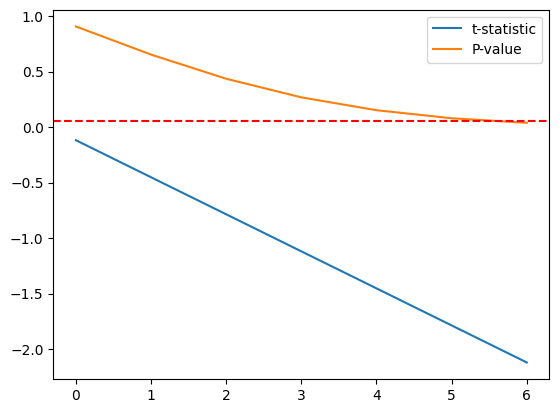

In [ ]:
# Графики статистики критерия и P-value
plt.plot(t_stats, label="t-statistic")
plt.plot(p_values, label="P-value")
plt.axhline(alpha, color="red", linestyle="--")
plt.legend()
plt.show()

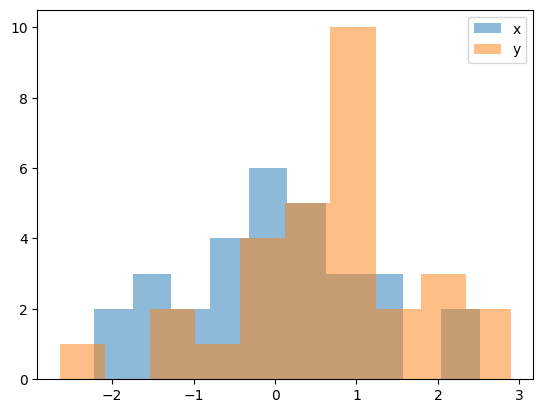

In [ ]:
# Гистограммы выборок
plt.hist(x_4, alpha=0.5, label='x')
plt.hist(y_4, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

5. Для второй выборки назначить $a_2$ равным середине пройденного отрезка из пункта 3. Постепенно увеличивать число элементов в выборках и осуществлять проверку гипотезы $H_0: a_1= a_2$ до тех пор, пока гипотеза $H_0$ не будет отвергнута.

In [ ]:
a_new = (a + a_new) / 2
y -= (a_new - a) / 2
t_stats, p_values = [], []
rejected = False

while not rejected:
    t_stat, p_value = stats.ttest_ind(x, y, equal_var=True)
    rejected = p_value < alpha
    t_stats.append(t_stat)
    p_values.append(p_value)
    if not rejected:
        x = np.hstack((x, np.random.normal(a, sigma, int(n*delta))))
        y = np.hstack((y, np.random.normal(a_new, sigma, int(n*delta))))

print('Размеры выборок: len(x)=', len(x), 'len(y)=', len(y))

x_5, y_5 = x, y

Размеры выборок: len(x)= 132 len(y)= 132


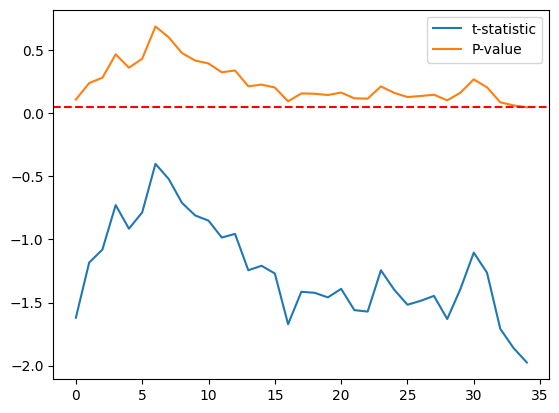

In [ ]:
# Графики статистики критерия и P-value
plt.plot(t_stats, label="t-statistic")
plt.plot(p_values, label="P-value")
plt.axhline(alpha, color="red", linestyle="--")
plt.legend()
plt.show()

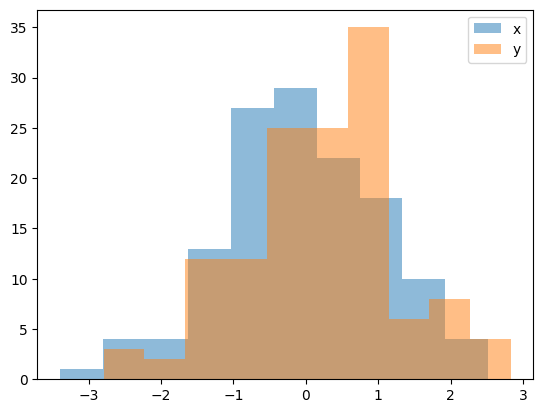

In [ ]:
# Гистограммы выборок
plt.hist(x_5, alpha=0.5, label='x')
plt.hist(y_5, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

6. Рассчитать 95% доверительные интервалы для математических ожиданий двух выборок в момент, когда гипотеза $H_0$ была отвергнута в пунктах 3 и 4.

In [ ]:
print("Рассчет и вывод 95% доверительных интервалов для пограничных выборок из п.4")
conf_int_x = stats.t.interval(0.95, len(x_4)-1, loc=np.mean(x_4), scale=stats.sem(x_4))
conf_int_y = stats.t.interval(0.95, len(y_4)-1, loc=np.mean(y_4), scale=stats.sem(y_4))

print(f"95% доверительный интервал для x: {conf_int_x}")
print(f"Ширина {conf_int_x[1] - conf_int_x[0]}")
print(f"95% доверительный интервал для y: {conf_int_y}")

Рассчет и вывод 95% доверительных интервалов для пограничных выборок из п.4
95% доверительный интервал для x: (-0.41655847843919264, 0.4379411847251901)
Ширина 0.8544996631643828
95% доверительный интервал для y: (0.05691320837671243, 0.9356221426586907)


In [ ]:
print("Рассчет и вывод 95% доверительных интервалов для пограничных выборок из п.5")
conf_int_x = stats.t.interval(0.95, len(x_5)-1, loc=np.mean(x_5), scale=stats.sem(x_5))
conf_int_y = stats.t.interval(0.95, len(y_5)-1, loc=np.mean(y_5), scale=stats.sem(y_5))

print(f"95% доверительный интервал для x: {conf_int_x}")
print(f"Ширина {conf_int_x[1] - conf_int_x[0]}")
print(f"95% доверительный интервал для y: {conf_int_y}")

Рассчет и вывод 95% доверительных интервалов для пограничных выборок из п.5
95% доверительный интервал для x: (-0.23689308311002838, 0.13601350038617754)
Ширина 0.3729065834962059
95% доверительный интервал для y: (0.027885443370458757, 0.3913444607836871)


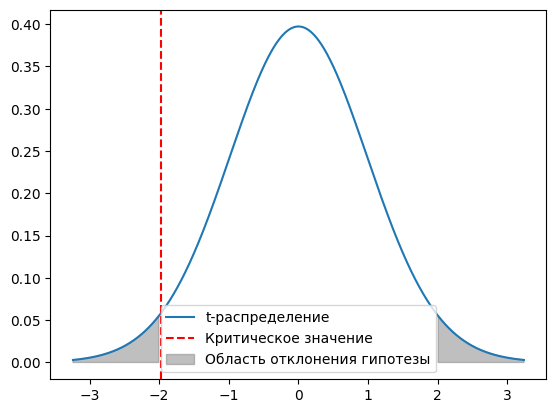

In [ ]:
# График t-критерий, плотность, t-распределение
t_dist = np.linspace(stats.t.ppf(0.001, n+m-2), stats.t.ppf(0.999, n+m-2), 1000)
pdf_values = stats.t.pdf(t_dist, n+m-2)

plt.plot(t_dist, pdf_values, label='t-распределение')
plt.axvline(t_stat, color='r', linestyle='--', label='Критическое значение')
plt.fill_between(t_dist, pdf_values, where=((t_dist < stats.t.ppf(alpha/2, n+m-2)) | (t_dist > stats.t.ppf(1 - alpha/2, n+m-2))), color='gray', alpha=0.5, label='Область отклонения гипотезы')
plt.legend()
plt.show()

In [ ]:
print(f'Критическое значение: {t_stat:.4f}')

Критическое значение: -1.9759


In [ ]:
ci_low_a1, ci_high_a1 = stats.norm.interval(0.95, loc=np.mean(x_0), scale=stats.sem(x))
ci_low_a2, ci_high_a2 = stats.norm.interval(0.95, loc=np.mean(y_0), scale=stats.sem(y))

print(f'Доверительный интервал для первой выборки: [{ci_low_a1:.4f}, {ci_high_a1:.4f}]')
print(f'Доверительный интервал для второй выборки: [{ci_low_a2:.4f}, {ci_high_a2:.4f}]')

Доверительный интервал для первой выборки: [-0.1740, 0.1954]
Доверительный интервал для второй выборки: [0.3162, 0.6763]
